## Linear Model

Linear regression is a very simple approach for supervised learning. It's a useful tool for predicting a quantitative response. It has been around for quite a long time and is the topic of innumerable textbooks. Though it may seem too simple when compared to advanced models, it still works widely as a statistical learning method.

Although simple, linear regression can work as a great benchmark when we are training our statistical learning model. And beyond linear regression, we can have many generalizations and extensions which make simple linear regression powerful.

So it is very important to have a deep understanding of linear regression and learn basic statistical learning essentials based on this simple but important model.

### Linear regression with **Normal Equation**

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os, sys

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings(action="ignore")

### Linear Regression Models and Ordinary Least Squares (OLS)

#### Model assumption:
$$y =X\beta + \epsilon $$
OR 
$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$
There are lots of different model assumptions for linear model. In our case, to make it comparable to other models and put it simply, we can presume such points:

1. Linear relationship: Y can be expressed as a linear expression of X
2. Random sampling: not all the $X_i$ are the same
3. $E[\epsilon] = 0, E[\epsilon|X] = 0$, which indicates that $\epsilon$ is just white noise, if $\epsilon$ is not around 0, we can shift part of the residual to the intercept term 
4. No perfect colinearity in $X$: otherwise we can express those variables as linear combination of other dimensions

Here in this model expression, inside $X$ we already have intercept $\beta_0$. $X^T = (1, X_1, X_2, ... ,X_p)$ where $1$ is the vector of all numbers 1. 

$$
X = \begin{bmatrix}
1 & x_{11} & x_{12} & ... & x_{1p}\\
1 & x_{21} & x_{22} & ... & x_{2p}\\
... & ... & ... & ... & ...\\
1 & x_{N1} & x_{N2} & ... & x_{Np}\\
\end{bmatrix}
$$ 

Here $N$ is the number of total samples and p is the number of total features. So considering the intercept, totally in $X$ the shape is $N \times(p+1)$

#### Loss function:
Here in linear regression, we can easily define loss function as of **MSE: mean square error**
$$RSS(\beta) = \sum_{i=1}^N(y_i - f(x_i))^2 = \sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2$$

Or equivalently:
$$RSS(\beta) = (y- X\beta)^T(y - X\beta)$$

How to solve this?
$$\frac{\partial RSS(\beta)}{\partial \beta} = -2X^T(y-X\beta)$$
$$\frac{\partial^2 RSS(\beta)}{\partial \beta \partial \beta^T} = 2X^TX$$

If $X$ is full rank (here we only consider full rank), $X^TX$ is positive definite, so based on the first order condition:
$$\frac{\partial RSS(\beta)}{\partial \beta} = 0$$
We can get 
$$X^T(y-X\beta) = 0$$
So
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$
Here $\hat{}$ means the estimation of the parameter

#### Computational Complexity
What's the computational complexity of this algorithm? And what's the bottleneck of such method?

Since in the normal equation we need to compute $X^TX$ and then its inverse, we need to know that the computational complexity of inverting such manupulation is roughly around $O(n^{2.4}) \sim O(n^3)$, which depends on the size of the features n.

So above is the linear model's  normal equation.

What if we do not have so many dimensions, but just 1 $X_1$ together with $X_0 = 1$ as intercept?
And how about we have no regressor but just intercept $X_0 = 1$?

**Leave this as homework**, actually you can also try to translate the code below

To better illustrate and visualize some examples, we will start from univariable regression as $y  \sim X$

In [2]:
## generate samples
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

[-1, 3, -2, 15]

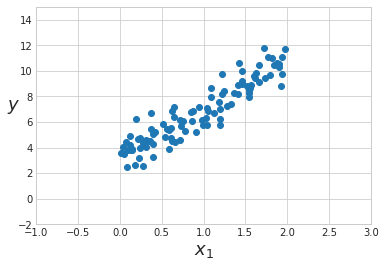

In [3]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.axis([-1, 3, -2, 15])



Based on our normal equation 
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

We can do like this:

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance, which is the intercept
beta_estimation = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_estimation

array([[3.21509616],
       [3.77011339]])

Now lets fit some new points:

In [5]:
X_new = np.array([[-0.5], [2.5]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance, as intercept
y_predict = X_new_b.dot(beta_estimation)
## beta_estimation[0] + -0.5*beta_estimation[1]
y_predict

array([[ 1.33003946],
       [12.64037962]])

[-1, 3, -2, 15]

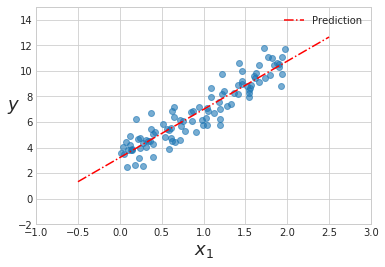

In [6]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y, alpha=0.6)
ax.plot(X_new, y_predict, 'r-.', label='Prediction')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
ax.axis([-1, 3, -2, 15])


Or we can do sepecifically for univariable regression:

$$\hat{\beta_1} = \frac{S_{xy}}{S_{xx}} = \frac{\sum (X_i - \bar{X})(y_i - \bar{y})} {\sum (X_i - \bar{X})(X_i - \bar{X})}$$

$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{X}$$

In [7]:
Sxx = 0
Sxy = 0

Sxx = np.sum(np.power(X-np.mean(X),2))
Sxy = np.sum((X-np.mean(X))*(y-np.mean(y)))
    
sBeta_1 = Sxy/Sxx
sBeta_0 = np.mean(y) - sBeta_1*np.mean(X)
sBeta_0,sBeta_1

(3.215096157546748, 3.7701133864384833)

Since we are now learning scikit learn. We can also use scikit learn model to solve this problem:

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.21509616]), array([[3.77011339]]))

In [9]:
## Compare the difference
np.allclose(beta_estimation.reshape(-1) , np.array([lin_reg.intercept_[0], lin_reg.coef_[0][0]]))

True

In [10]:
X_new

array([[-0.5],
       [ 2.5]])

In [11]:
lin_reg.predict(X_new)

array([[ 1.33003946],
       [12.64037962]])

[-1, 3, -2, 15]

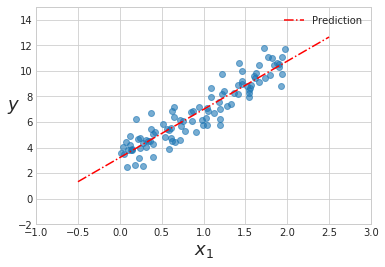

In [12]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(X, y, alpha=0.6)
ax.plot(X_new, lin_reg.predict(X_new), 'r-.', label='Prediction')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.legend()
ax.axis([-1, 3, -2, 15])


But in reality, sklearn do not solve OLS merely based on normal equation, but ultimately depends on the SVD matrix decomposition. Just imagine the case when $X^TX$ is not full rank.

### Gradient descent:
It's lucky that the OLS has an explicit mathematical formula for the solution. But it's not always the case, as we can see for other models later. So how can we deal with that?

Another important approach for solving these questions is **gradient descent**.

**Gradient Descent** is a general approach for solving optimization problems, especially for convex optimization problems. In a convex problem, gradient descent can always find global optimal solution via exploring the solution surface.

And the general expression of gradient descent is super simple and intuitive:
$$\theta^{(nextstep)} = \theta - \eta \nabla_{\theta}LOSS(\theta)$$

Where $\theta$ is our target parameter sets, $\eta$ is usually called learning rate. $\nabla_{\theta}LOSS(\theta)$ is the gradient of the loss function.

But in reality we need to take care of the gradient computation and tuning the hyper-parameters.

In our linear regression problem, the loss function is $MSE(\beta)$, and we can easily compute the gradient of the loss function:$$\frac{\partial{MSE(\beta)}}{\partial{\beta_j}} = \frac{2}{m}\sum_{i=1}^{m}(\beta^Tx^{(i)} - y^{(i)})x_{j}^{(i)}$$
Where $j$ is the dimension and $i$ goes through all the samples.

In [13]:
X.shape

(100, 1)

In [14]:
## Learning rate
eta = 0.1
num_iterations = 1000
total_num_of_samples = X.shape[0]
## initialize the parameter
beta_byGradientDescent = np.random.randn(2,1)

beta_byGradientDescent_path = []
for each_iteration in range(num_iterations):
    gradients = 2/total_num_of_samples * X_b.T.dot(X_b.dot(beta_byGradientDescent) - y)
    beta_byGradientDescent = beta_byGradientDescent - eta * gradients
    beta_byGradientDescent_path.append(beta_byGradientDescent)

In [15]:
beta_byGradientDescent

array([[3.21509616],
       [3.77011339]])

In [16]:
beta_estimation

array([[3.21509616],
       [3.77011339]])

Gradient descent gives us almost the same result as of normal equation.

In [17]:
np.allclose(beta_byGradientDescent, beta_estimation)

True

### Stochastic Gradient Descent
As we can see from the formula and code, gradient descent needs to use the whole training data to calculate the gradient, which can be slow especially when the dataset is very large. Another way to fast the approach is to adjust the gradient computation to be based on single random data point rather than the whole training set. Which is called **stochastic gradient descent**, a.k.a. **SGD**

In [18]:
## Stochastic gradient descent looping times
n_epochs = 500
## fix learning rate
eta = 0.001
total_num_of_samples = X.shape[0]


beta_SGD = np.random.randn(2,1)  # random initialization

beta_SGD_path = []
for each_epoch in range(n_epochs):
    for i in range(total_num_of_samples):
        
        random_index = np.random.randint(total_num_of_samples)
        ## Every time pick 1 single data point
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(beta_SGD) - yi)
        beta_SGD = beta_SGD - eta * gradients
        beta_SGD_path.append(beta_SGD)

In [19]:
beta_SGD

array([[3.25314299],
       [3.82984675]])

We can see that even if not exactly the same as previous result, but we are very close to it.

In [20]:
def learning_schedule(t):
    t0, t1 = 1, 100  # learning schedule hyperparameters
    return t0 / (t + t1)
        
## Stochastic gradient descent looping times
n_epochs = 50
total_num_of_samples = X.shape[0]

beta_SGD2 = np.random.randn(2,1)  # random initialization

beta_SGD2_path = []
for each_epoch in range(n_epochs):
    for i in range(total_num_of_samples):
        
        random_index = np.random.randint(total_num_of_samples)
        ## Every time pick 1 single data point
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        ## update learning schedule
        eta = learning_schedule(each_epoch*total_num_of_samples + i)
#         eta = 0.001
        gradients = 2 * xi.T.dot(xi.dot(beta_SGD) - yi)
        beta_SGD2 = beta_SGD2 - eta * gradients
        beta_SGD2_path.append(beta_SGD2)

In [21]:
beta_SGD2

array([[-1.92518915],
       [-0.24495324]])

As we can see SGD cannot guarantee the convergence of the optimization. Sometimes we also need to take care of tuning the hyper-parameters.


SGD is also implemented in scikit-learn as a built-in API.

In [22]:
from sklearn.linear_model import SGDRegressor
## max_iter is the number of maximum epoches, tol is the converging tolerance, eta is the learning rate
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=0)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=0,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.21101192]), array([3.7665544]))

Furthermore, we can combine gradient descent with stochastic gradient descent together, stochastically deal with batch data, in order to improve the stability and speed of both algorithm. This is known as **Mini-batch Gradient Descent**. As indicated from the name, in **Mini-batch Gradient Descent**, we re-organize the whole batch of data into several mini batches, and then apply stochastic gradient descent on them, each mini-batch as a data point in SGD.

In [24]:
n_epoches = 200
minibatch_size = 20
total_num_of_samples = X.shape[0]

np.random.seed(42)

beta_minibatch = np.random.randn(2,1)  # random initialization
eta = 0.005

beta_minibatch_path = []
for each_epoch in range(n_epoches):
    ## re-organize original dataset
    shuffled_indices = np.random.permutation(total_num_of_samples)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, total_num_of_samples, minibatch_size):
        ## select mini batch of the data
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        ## Gradient computation is the same as batch gradient descent
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(beta_minibatch) - yi)
        beta_minibatch = beta_minibatch - eta * gradients
        beta_minibatch_path.append(beta_minibatch)

In [25]:
beta_minibatch

array([[3.29100691],
       [3.70415877]])

We can also compare the trajectory of those different algorithms when we are doing the optimization:

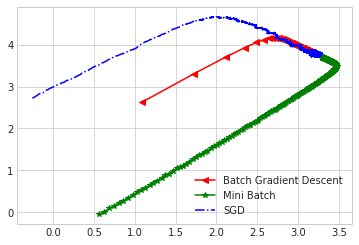

In [26]:
toNpArray = lambda l : np.array(l)
optpaths= {'Batch Gradient Descent' : (toNpArray(beta_byGradientDescent_path), 'r-<'), 
           'Mini Batch' : (toNpArray(beta_minibatch_path), 'g-*'),
           'SGD' : (toNpArray(beta_SGD_path), 'b-.')}

fig = plt.figure()
ax = plt.axes()
for each_key in optpaths.keys():
    current_series = optpaths.get(each_key)[0]
    current_style = optpaths.get(each_key)[1]
    
    ax.plot(current_series[:,0], current_series[:,1], current_style,label = each_key)

ax.legend()

### Basis Function Regression:

In order to make linear regression powerful, like go beyond linear relationship between variables, we can apply basis function to expand the space of regressors.

The idea is to take our multidimensional linear model:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... + \beta_p x_p$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some basis function.

#### Polynomial regression:

Polynomial regression is applying polynomial function to the input and made them as basis to perform OLS on them.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 3, 5])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  1.,   1.,   1.],
       [  3.,   9.,  27.],
       [  5.,  25., 125.]])

We can see now from the original 1-dim input, we transformed the data into 3-dim by calculating polynomial basis.
Or equivalently, we can apply scikit-learn's pipeline to do the feature engineering.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
poly_model = make_pipeline(PolynomialFeatures(10),
                           LinearRegression())

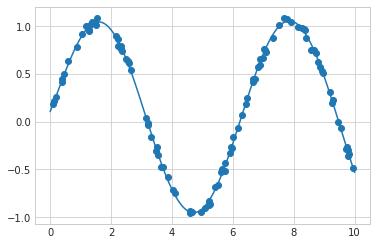

In [29]:
# rng = np.random.RandomState(42)
## we can also use rng to generate random numbers
x = 10 * np.random.rand(100, 1)
y = np.sin(x) + 0.1 * np.random.rand(100, 1)

xfit = np.linspace(0, 10, 1000)

poly_model.fit(x, y)
yfit = poly_model.predict(xfit.reshape(len(xfit),1))

plt.scatter(x, y)
plt.plot(xfit, yfit)

### Regularization

Add degree of polynomial features can help us better fit the model in training set, but it can also be overfitting from time to time. From previous example we can see that, by adding the degree up to 10, we can use polynomial to fit a sin(x) function, which can never generalize well in new dataset. So in order to have an idealistic model, we not only need to look at the fitting but also need to keep the model as simple as possible.

For linear models, usually we can add constraints to the compexity of the parameters to regularize the model.And the most used constrained models are Ridge (L2 constraint), LASSO (L1 constraint), and Elastic Net (L2+L1 constraint).


#### Ridge regression

The simplest way to understand ridge regression is based on adding weight constraint to the simple linear regression. The loss function of ridge regression is like such:
$$L_{Ridge}(\beta) = MSE(\beta) + \alpha \frac{1}{2}\sum_{i=1}^n \beta_i^2$$

Where $MSE(\beta)$ is the loss function of simple linear regression.

Ridge is also called $L_2$ regularization because the regularization term is the $L_2$ norm of the weight vector.

Ridge regression also has an analytical closed-form solution:

$$\hat{\beta} = (X^T \cdot X + \alpha I_{n}) ^{-1} \cdot X^T \cdot y$$
Where $I_{n}$ is $n \times n$ identity matrix.

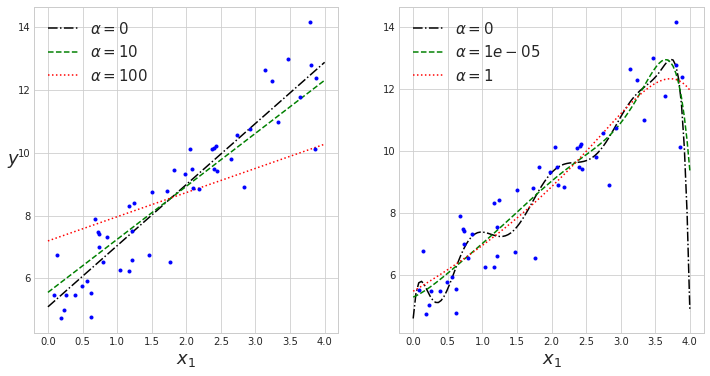

In [63]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)
n_samples = 50
X = 4 * np.random.rand(n_samples, 1)
y = 5 + 2 * X + np.random.randn(n_samples, 1) 

X_new = np.linspace(0, 4, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas):
    
    for alpha, style in zip(alphas, ("k-.", "g--", "r:")):
       
        if alpha == 0:
            model = LinearRegression()
        else:
            model = model_class(alpha) 
        
        if polynomial:
            
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
            
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)

    plt.legend(loc="best", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))

plt.show()

We can look closer into the ridge model:

In Scikit-Learn we can implement such model based on Ridge model or add penalty to SGDRegressor

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.02120447]])

In [32]:
## There are some inconsistency between Ridge from linear_model and SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=-np.infty, penalty="l2", l1_ratio=0, alpha=1,  random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.25646107])

#### LASSO
**Least Absolute Shrinkage and Selection Operator Regression** a.k.a **LASSO** is $L_1$ regularization of simple linear model. Similar to Ridge regression, in LASSO we add $L_1$ weight constraint to the loss function rather than $L_2$ in Ridge.

$$L_{LASSO}(\beta) = MSE(\beta) + \alpha\sum_{i=1}^n |\beta_i|$$

Unfortunately, LASSO does not have closed-form formula solution. It can only be solved via numerical optimization methods, such as SGD.

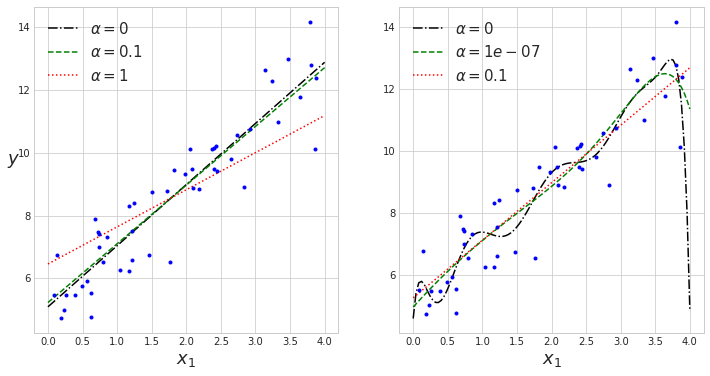

In [79]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1))
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 0.1))
plt.show()

In [84]:
model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", Ridge(alpha=0.1)),
                ])
model.fit(X,y)
model['regul_reg'].coef_

array([[ 2.05283729,  0.13699084, -0.27822174,  0.01524129,  0.3785131 ,
         0.56105035,  0.49113606,  0.17403438, -0.35351314, -1.04570015]])

In [85]:
model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", Lasso(alpha=0.1)),
                ])
model.fit(X,y)
model['regul_reg'].coef_

array([2.12394062, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [74]:
model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", Lasso(alpha=0.001)),
                ])
model.fit(X,y)
model['regul_reg'].coef_

array([ 2.30410445, -0.39830144, -0.18162864, -0.        ,  0.9332658 ,
        0.62826988,  0.08336896,  0.        , -0.        , -1.2309604 ])

The most significant difference between LASSO and Ridge is that ridge can zero-off least important features, setting their weight to 0.

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.03458166])

In [61]:
lasso_reg.coef_

array([1.86772109])

In [35]:
sgd_reg = SGDRegressor(max_iter=1000, tol=-np.infty, penalty="l1", l1_ratio=1, alpha=0.1,  random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.03728277])

In [36]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

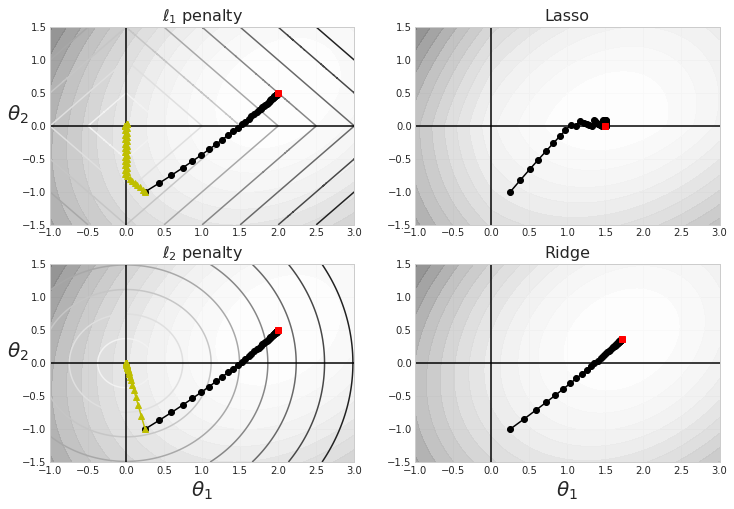

In [37]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "k-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "k-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

#### Elastic Net

Elastic Net combines both LASSO and Ridge regression, with both $L_1$ and $L_2$ penalty.

$$L_{EN}(\beta) = MSE(\beta) + r\alpha\sum_{i=1}^n |\beta_i|+ (1-r)\alpha\frac{1}{2}\sum_{i=1}^n \beta_i^2$$

Where $r$ is the weight ratio between Ridge $L_2$ penalty and LASSO $L_1$ penalty.

How to implement elastic net in Scikit-learn? We already have very good examples for Ridge and LASSO. Try to refer to the document and then find out it!

## Logistic Regression

Regression can go beyond prediction to classification. Logistic regression is a widely used machine learning algorithm for classification. We will begin from binary classification.

Recall the simple linear model is:
$$y = \theta^T \cdot x +b$$

How to transfer this simple linear model into a classification model? we can try to find a function to map the regression results to the prediction value, say $$y = g(\theta^T \cdot x +b)$$

And if we define sigmoid function as $$\sigma(t) = \frac{e^t}{1+e^t} = \frac{1}{1+e^{-t}}$$ 
(PS : such function is widely used in deep learning)
And set $g(t) = \sigma(t)$

We can have Logistic Regression:
$$y= \sigma(\theta^T\cdot x + b)$$

Where $\theta$ is the parameter set we are going to learn in the algorithm, $x$ is the data observation.

 
And finally we have $$y =  \frac{1}{1 + e^{- \theta^T\cdot x +b}}$$

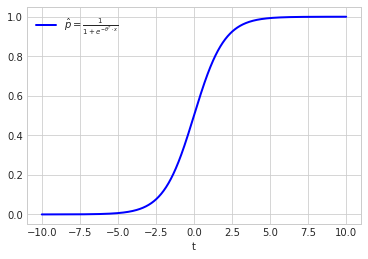

In [38]:
## When b = 0, centralize the graph
t = np.linspace(-10, 10, 1000)
sigmoid = np.exp(t) / (1 + np.exp(t))

fig = plt.figure()
ax = plt.axes()

ax.plot(t, sigmoid, "b-", linewidth=2 ,label= r"$\hat{p} = \frac{1}{1 + e^{- \theta^T\cdot x}}$")
ax.set_xlabel("t")
ax.legend()

We can see that $\sigma(0) = 0.5$, and when $\sigma(t) > 0.5$ we can predict target $\hat{y} = 1$. When $\sigma(t) \leq 0.5$ we can predict target $\hat{y} = 0$

This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive

#### Loss function of Logistic Regression:

We take log in both sides
$$ln \frac{y}{1-y} = \theta^T \cdot x +b$$

If we view $y$ as $p(y=1|x)$, we can get
$$ln\frac{p(y=1|x)}{p(y=0|x)} = \theta^T \cdot x +b$$


And in the binary classification problem, if we view $y$ as probability of positive case and $1-y$ as the probability of negative case, $\frac{y}{1-y}$ is called "odds", which indicates the relative probability of $x$ as positive case. And $ln \frac{y}{1-y}$ is "log odds", a.k.a "logit"

And obviously $$p(y=1|x) = \frac{e^{\theta^Tx+b}}{1+e^{\theta^Tx+b}}$$

$$p(y=0|x) = \frac{1}{1+e^{\theta^Tx+b}}$$

So if we apply maximum likelihood method to estimate $\theta$ and $b$, for given data samples, likelihood is:
$$L(\theta, b) = \Pi_{i=1}^m p(y_i|x_i;\theta, b)$$
Take log on both sides, we got log-likelihood is:
$$l(\theta, b) = \sum_{i=1}^m ln [p(y_i|x_i;\theta, b)]$$




To make the expression simple, we can consider $x$ with constant 1 so that we can integrate the intercept $b$ : from $\theta^T x + b$ to $\theta^T x$ 

And take into consideration that we are doing binary classification, so $p_1(x,\theta) = p(y=1|x;\theta)$, $p_0(x,\theta) = p(y=0|x;\theta) = 1 - p(y=1|x;\theta)$ we can get a new expression of the likelihood function:

$$p(y_i|x_i; \theta) = y_ip_1(x;\theta) + (1-y_i)p_0(x;\theta)$$

And so that we have a new  negative log-likelihood function as our loss function:

$$l(\theta) = \sum_{i=1}^m(-y_i\theta^Tx_i + ln(1+ e^{\theta^Tx_i}))$$


And this loss function is differentiable w.r.t $\theta$, if we apply first-order optimization techniques, such as **Gradient Descent, SGD**, we can easily get the results.

$$\frac{\partial l(\theta)}{\partial \theta} = - \sum_{i=1}^m x_i(y_i - p_1(x_i;\theta)) = \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i$$

And for the $j-th$ dimension, 
$$\frac{\partial l(\theta)}{\partial \theta_j} =  \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i^{(j)}$$
Where x already includes $1$ as for the intercept $b$





As case study, we are going to use **Iris dataset** from sklearn, and we are going to look deep into the dataset as we are also going to use it for several other algorithms studies.

In [39]:
from sklearn import datasets
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [40]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Target is encoded as numerical numbers, and the detailed information can be seen from the mapping:

In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
len(iris.target)

150

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

For the dataset, it contains such features:

In [43]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [87]:
len(iris.data)

150

Since we are now talking about binary classification, we will select one feature and distinguish one target from others.

In [45]:
X = iris.data[:, 0].reshape((len(iris.data[:, 0]),-1))  # sepal length (cm)
y = (iris.target == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

Let's first look at sklearn Losgistic Regression API:

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

The intercept $b$ is as:

In [47]:
log_reg.intercept_

array([-3.9921824])

And the $\theta$ to be multiplied to $x$ is: 

In [48]:
log_reg.coef_

array([[0.57972675]])

First let's use the formula to do the calculation ourself.

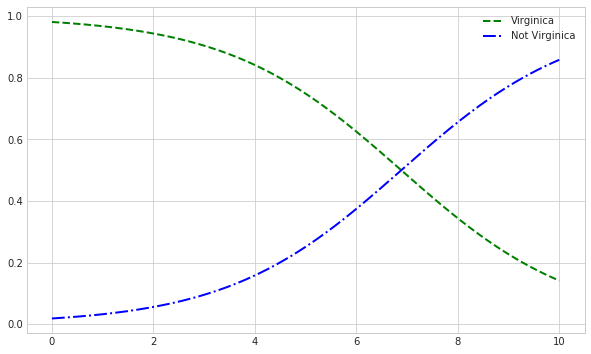

In [49]:
feature_new = np.linspace(0, 10, 1000).reshape(-1, 1)
# y_proba = log_reg.predict_proba(X_new)
## Since log_reg is fitting intercept
target_probability_1 = 1/(1+np.exp(-(log_reg.coef_*feature_new+log_reg.intercept_)))
target_probability_2 = 1/(1+np.exp(log_reg.coef_*feature_new+log_reg.intercept_)) 
target_probability = np.c_[target_probability_1, target_probability_2]

fig = plt.figure(figsize=(10,6))
ax= plt.axes()

ax.plot(feature_new, target_probability[:, 1], "g--",  linewidth=2, label="Virginica")
ax.plot(feature_new, target_probability[:, 0], "b-.", linewidth=2, label="Not Virginica")
ax.legend()

In [59]:
decision_boundary = np.min(feature_new[target_probability[:, 1] >= 0.5])
decision_boundary

6.886886886886887

For Logistic Regression, we can see the boundary is linear w.r.t to the distribution of the datasets. Which is still true even when we generalize our model to higher dimensions.

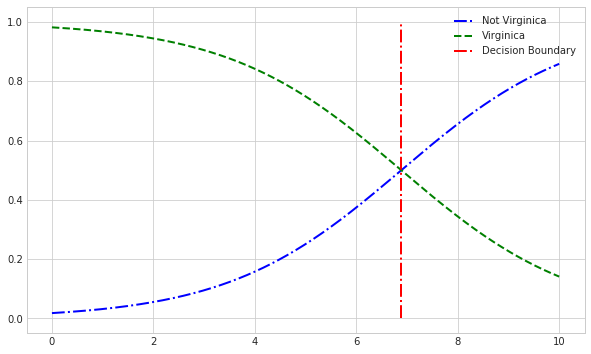

In [92]:
feature_new = np.linspace(0, 10, 1000).reshape(-1, 1)
target_probability = log_reg.predict_proba(feature_new)

fig = plt.figure(figsize=(10,6))
ax= plt.axes()

ax.plot(feature_new, target_probability[:, 1], "b-.",  linewidth=2, label="Not Virginica")
ax.plot(feature_new, target_probability[:, 0], "g--", linewidth=2, label="Virginica")
ax.plot([decision_boundary, decision_boundary], [0, 1], "r-.", linewidth=2, label= 'Decision Boundary')
ax.legend()

In [52]:
log_reg.predict_proba([[6], [8]])

array([[0.62570199, 0.37429801],
       [0.34397462, 0.65602538]])

In [53]:
## Based on the decision boundary
log_reg.predict([[6], [8]])

array([0, 1])

And beyond the scikit-learn's built-in API, how can we build a Logistic Regression model on our own? As long as we already have the loss function, the gradient, and good example for implementing various gradient descent algorithms, you can try to build one! 

### Softmax Regression

Without training and combining multiple binary classifier, Logistic Regression can be extended to classify multiple classes directly. The generalized model is called Softmax Regression.

Softmax function:
$$\hat{p_k} = \sigma(s(x))_k = \frac{exp(s_k(x))}{ \sum_{j=1}^K exp(s_j(x))}$$

- $K$ is the number of classes
- $s(x) = \theta_k^T \cdot x$ where $\theta_k$ is the parameter to be learned.
- $\sigma(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given
the scores of each class for that instance.

And naturally the prediction is like:
$$\hat{y} = argmax_k \sigma(s(x))_k = argmax_k s_k(x) = argmax_k (\theta_k^T \cdot x)$$

And here we can use cross entropy as cost function:

$$L(\Theta) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log(\hat{p_k}^{(i)})$$

- $y_k^{(i)}$ is equal to 1 if the target class for the i-th instance is $k$ otherwise 0

And the gradient is like:

$$\nabla_{\theta_k} L (\Theta) = \frac{1}{m}\sum_{i=1}^m(\hat{p_k}^{(i)} - y_k^{(i)})x^{(i)}$$

In [54]:
X = iris.data[:, 2: ]  # petal length and petal width
y = iris.target


In [55]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [56]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
## As 3 classes, we have 3 intercepts
softmax_reg.intercept_

array([ 18.87514796,   6.3844344 , -25.25958236])

In [58]:
softmax_reg.coef_

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])